In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1D Random walk

We will concider two kinds of 1D random talk.
* $dx$ is uniformly distributed between $[-1/2, +1/2]$.
* $dx=+1$ with probability 1/2 and $dx=-1$ with probability 1/2.

For both kinds of the 1D random walk, you should do the following:
* Plot a single trajectory.
* Plot the histogram of the end point for an ensemble of trajectories.

Set each random walk runs 60000 steps and run 1000 times random walk for statistics.

In [2]:
n_step = 60000
n_run = 1000

(a) Let $dx$ uniformly distribute between $[-1/2, +1/2]$:

In [3]:
dx = np.random.random(n_step) - 0.5

Check for $dx$ probability distribution:

Text(0.5, 0, 'dx')

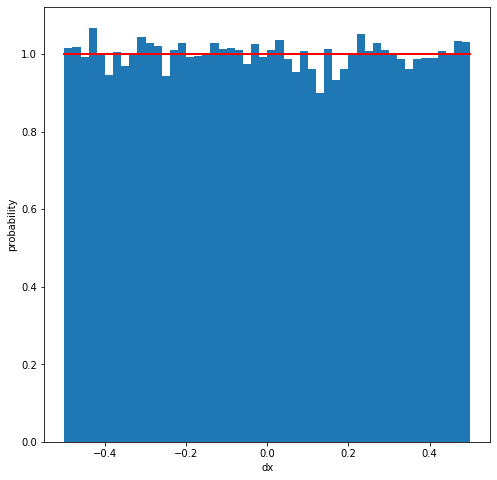

In [4]:
fix, ax = plt.subplots(figsize = (8, 8))
_ = ax.hist(dx, bins = 50, density = True)
ax.plot([-0.5,0.5], [1,1], linewidth=2, color='r')
ax.set_ylabel('probability')
ax.set_xlabel('dx')

The standard derivation for $dx$ is:

In [5]:
dx2 = dx**2
sigma2 = 0
for i in range(n_step):
    sigma2 += dx2 [i]
sigma = np.sqrt(sigma2)
sigma

70.87381403872809

with theoretical value:

In [6]:
np.sqrt(2/3*0.5**3*n_step)

70.71067811865476

Define the fucntion for 1D random walk:

In [7]:
def RandomWalk_1D_1(n_step, n_run):
    end_point = []
    for i in range(n_run):
        dx = np.random.random(n_step) - 0.5
        position = np.zeros(n_step + 1)
        for j in range(n_step):
            position[j + 1] = position[j] + dx[j]
        end_point.append(position[-1])
    return position, end_point

Plot a single trajectory.

Text(0, 0.5, 'position')

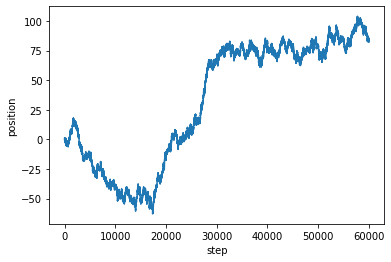

In [8]:
position, _ = RandomWalk_1D_1(n_step, 1)
plt.plot(position)
plt.xlabel('step')
plt.ylabel('position')

Plot the histogram of the end point for an ensemble of trajectories:

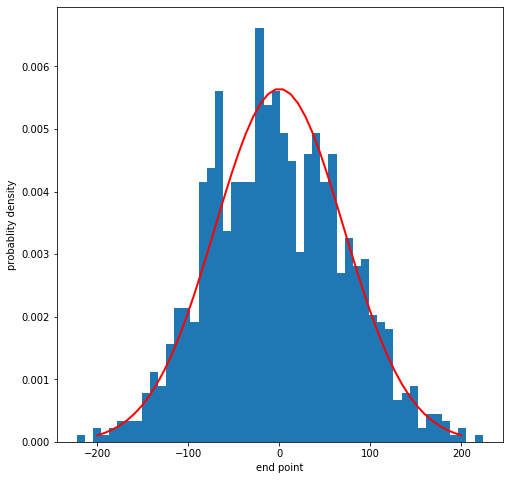

In [9]:
_, end_point = RandomWalk_1D_1(n_step, n_run)
fix, ax = plt.subplots(figsize = (8, 8))
_ = ax.hist(end_point, bins = 50, density = True)
ax.set_xlabel('end point')
ax.set_ylabel('probablity density')

mu, sigma = 0, np.sqrt(2/3*0.5**3*n_step)
x = np.linspace(-200, 200)
ax.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')

(b) Set $dx=+1$ with probability 1/2 and $dx=-1$ with probability 1/2:

In [10]:
dx = np.random.randint(2, size = n_step)
for i in range(n_step):
    if dx[i] < 1:
        dx[i] = -1

Check for $dx$ probability distribution:

Text(0, 0.5, 'probability')

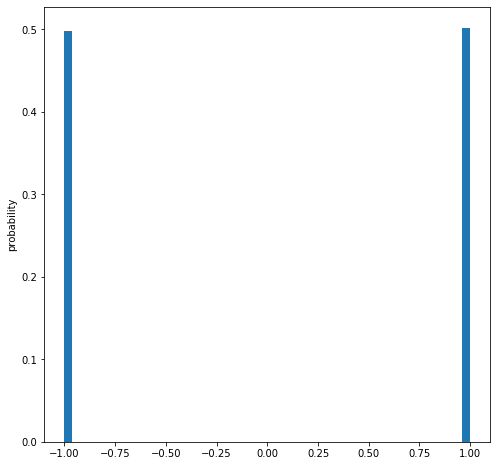

In [11]:
fix, ax = plt.subplots(figsize = (8, 8))
weights = np.ones_like(dx)/n_step
_ = ax.hist(dx, bins = 50, weights = weights)
ax.set_ylabel('probability')

The standard derivation for $dx$ is:

In [12]:
dx2 = dx**2
sigma2 = 0
for i in range(n_step):
    sigma2 += dx2 [i]
sigma = np.sqrt(sigma2)
sigma

244.94897427831782

with theoretical value:

In [13]:
np.sqrt(n_step)

244.94897427831782

Define the fucntion for 1D random walk:

In [14]:
def RandomWalk_1D_2 (n_step, n_run):
    end_point = []
    for i in range(n_run):
        dx = np.random.randint(2, size = n_step)
        for k in range(n_step):
            if dx[k] < 1:
                dx[k] = -1
        position = np.zeros(n_step + 1)
        for j in range(n_step):
            position[j + 1] = position[j] + dx[j]
        end_point.append(position[-1])
    return position, end_point

Plot a single trajectory.

Text(0, 0.5, 'position')

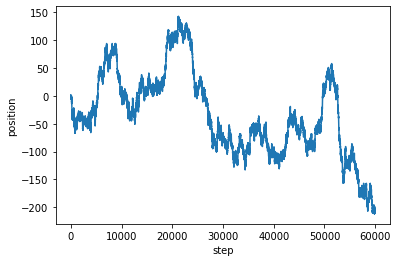

In [15]:
position, _ = RandomWalk_1D_2(n_step, 1)
plt.plot(position)
plt.xlabel('step')
plt.ylabel('position')

Plot the histogram of the end point for an ensemble of trajectories:

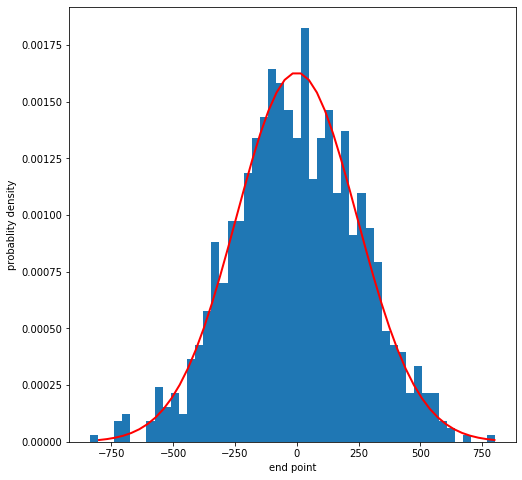

In [16]:
_, end_point = RandomWalk_1D_2(n_step, n_run)
fix, ax = plt.subplots(figsize = (8, 8))
_ = ax.hist(end_point, bins = 50, density = True)
ax.set_xlabel('end point')
ax.set_ylabel('probablity density')

mu, sigma = 0, np.sqrt(n_step)
x = np.linspace(-800, 800)
ax.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')